In [1]:

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import scipy as sp
import sklearn as sk
import graph_helpers as gh

%load_ext autoreload
%autoreload 2


# graphical lasso

On considère $n$ observations $x_{1},x_{2},\ldots ,x_{n}$. On s'interesse à l'estimation d'une matrice de précision $P = C^{-1}$. Si on fait l'hypothèse que les $x_i$ sont tirés aléatoirement suivant un va gaussienne $Z$, on espère que le C obtenu est une bonne estimation de la matrice de covariance de $Z$. 

Le graphical lasso résout
$$\operatorname {argmin} _{P \geq 0} \operatorname {tr} (S P )-\log \det(P )+\lambda \sum _{j\neq k}|P _{jk}|$$

où $S$ est la covariance des échantillons, et $\lambda$ est le paramètre de pénalisation.

Nous allons tester le graphical lasso sur les différentes formes de graphes synthétisés afin d'évaluer ses performances.

In [6]:
# on définit un graphe par sa matrice de précision
m = 16
a = -.2  # corrélation minimum 
name = "grilleCarree" #cyclique ou grilleCarree
A,Vx,Vy = gh.init_graph(name,m)

U = np.triu((1-a)*np.random.rand(m,m) + a)  # bruit balnc entre a et 1 
U=U+U.T    # Pour que Q soit symétrique
Q = A*U    # matrice de graphe pondéré
assert np.linalg.norm(Q-Q.T)<1e-6, "Q n'est pas symétrique !"

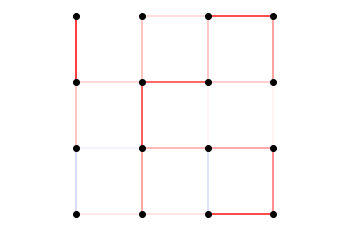

In [7]:
gh.dessin_graphe(Q,Vx,Vy)

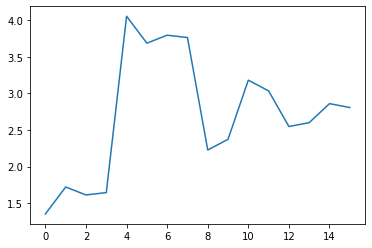

In [8]:
#Pour générer des vecteurs gaussiens de matrice l'inverse de Q, Q doit être inversible, 
#ce qui n'est pas forcément le cas. On modifie Q pour avoir des vp entre 0 et 1 (en particulier diagonale non nulle)
L = np.linalg.eigvals(Q)
c = -2*np.min(L)
P0 = Q + c*np.eye(m) 
#L = np.linalg.eigvals(P)
#plt.plot(L)
#Comme P peut avoir des vp nulle, et dc non inversible, on rajoute (P+kappa*Id)/(1+kappa) (vp entre kappa et 1 )
# donc le conditionnement vaut 1/kappa (plus kappa est petit plus le problème est dur à résoudre (à tester))
#kappa = 0.2
#P = P*(1-kappa)+kappa*np.eye(n) 
L = np.linalg.eigvals(P0)
plt.plot(L)

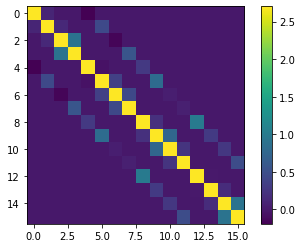

In [9]:
plt.imshow(P0)
plt.colorbar()

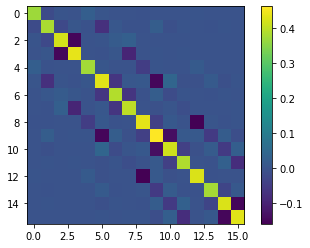

In [10]:
C0 = np.linalg.inv(P0)
plt.imshow(C0)
plt.colorbar()

In [11]:
n = 100 # nombre de samples
X = (sp.linalg.sqrtm(C0)@np.random.randn(m,n)).T
C = X.T@X/n

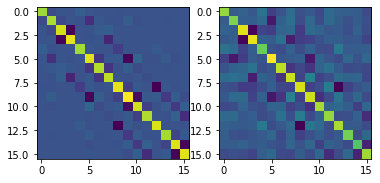

In [12]:
plt.subplot(1,2,1)
plt.imshow(C0)
plt.subplot(1,2,2)
plt.imshow(C)

In [25]:
import sklearn.covariance as skc
lamda = 0.1
C1,P1 = skc.graphical_lasso(C,lamda)

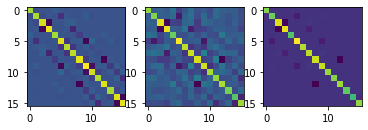

In [26]:
plt.subplot(1,3,1)
plt.imshow(C0)
plt.subplot(1,3,2)
plt.imshow(C)
plt.subplot(1,3,3)
plt.imshow(C1)

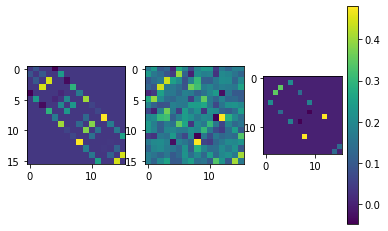

In [27]:
def remove_diag(M):
    return M - np.diag(np.diag(M))
plt.subplot(1,3,1)
plt.imshow(remove_diag(P0))
plt.subplot(1,3,2)
plt.imshow(remove_diag(np.linalg.inv(C)))
plt.subplot(1,3,3)
plt.imshow(remove_diag(P1))
plt.colorbar()

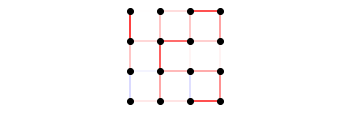

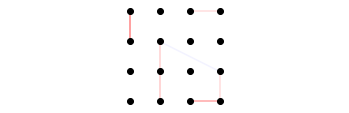

In [28]:
plt.subplot(2,1,1)
gh.dessin_graphe(P0,Vx,Vy)
plt.subplot(2,1,2)
gh.dessin_graphe(P1,Vx,Vy)

# A faire



* graphe SBM (stochastic bloc model)

* graphical lasso  : 
  - définir différentes distances (norme L1) ou critères d'erreur (critère 0/1 : slt nb aretes) + trouver meilleur lamda et meilleur n

  - puis faire pour plusierus samples pour avoir barre d'erreur


* graphical lasso avec cvxpt
